<a href="https://colab.research.google.com/github/Miqquelangel/Portfolio-Miguel-Angel/blob/main/Modelo_predicitivo_de_im%C3%A1genes_de_clasificaci%C3%B3n_binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OVERVIEW
Este proyecto está realizado completamente por mí.

Vamos a proceder a crear un modelo de Computer vision basado en Convolutional Neural Networks para identificar con precisión fotos de comida. En nuestro caso, steak o pizza.


**-Funciones a realizar:**

* Visualizar los datos con los cuales vamos a trabajar y prepararlos para ser introducidos en nuestro modelo **(normalización)**.
* Creación de un modelo de clasificación binario con los algoritmos más adaptados a nuestras necesidades. En este modelo concreto, trabajaremos con:
 * **Conv2D y MaxPool2D layers**
 * **Funciones de Activación 'ReLu' y 'Sigmoid'**
 * **Loss function = Binary_Crossentropy**
   
 
 * **optimizador ADAM.**

 * **Metrics = Accuracy**

* Visualizacion de la arquitectura de nuestro modelo y representación de forma gráfica de los parámetros obtenidos del mismo.

* Representación gráfica de las predicciones de nuestro modelo y análisis.


#PREPARACIÓN DEL ENTORNO DE TRABAJO

In [1]:
# Empezamos importando las librerías que vayamos a necesitar. A medida que vayamos necesitando más importaremos las correspondientes.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import keras
import os
from tensorflow.keras.utils import plot_model
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

#RECOLECCIÓN DE DATOS, INSPECCIÓN, VISUALIZACIÓN, ANÁLISIS Y PREPROCESAMIENTO.


##Recolección de datos

**Descarga de nuestros datos desde una web externa en formato 'zip'.**

**Vamos a descomprimirlos para manejarlos y alojarlos en nuestra sesión activa de Google Colab.**

In [2]:
# Descarga:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Descomprimir:
zipref=zipfile.ZipFile("pizza_steak.zip")
zipref.extractall()
zipref.close()

--2021-07-20 19:47:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  65.5MB/s    in 1.6s    

2021-07-20 19:47:31 (65.5 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspección

**Inspeccionamos los directorios de nuestros datos descargados para saber con que vamos a trabajar.**

In [ ]:
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jul 19 22:50 .
drwxr-xr-x 1 root root 4096 Jul 19 22:50 ..
-rw-r--r-- 1 root root 6148 Jul 19 22:50 .DS_Store
drwxr-xr-x 4 root root 4096 Jul 19 22:50 test
drwxr-xr-x 4 root root 4096 Jul 19 22:50 train


**Como podemos observar, los sets de entrenamiento y de testeo ya estaban hechos.**

**Vamos a inspeccionarlos para saber más sobre nuestros datos:**

In [ ]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"Hay {len(dirnames)} directorios y {len(filenames)} imágenes en '{dirpath}'.")

Hay 2 directorios y 1 imágenes en 'pizza_steak'.
Hay 2 directorios y 1 imágenes en 'pizza_steak/train'.
Hay 0 directorios y 750 imágenes en 'pizza_steak/train/steak'.
Hay 0 directorios y 750 imágenes en 'pizza_steak/train/pizza'.
Hay 2 directorios y 1 imágenes en 'pizza_steak/test'.
Hay 0 directorios y 250 imágenes en 'pizza_steak/test/steak'.
Hay 0 directorios y 250 imágenes en 'pizza_steak/test/pizza'.


**Tenemos 250 imágenes por cada clase en nuestro set de testeo y 750 por cada clase en nuestro set de entrenamiento. En total 1500 de entrenamiento y 500 de testeo.**

**Tenemos en total 3 imágenes (1 en 'pizza_steak', 1 en 'pizza_steak/test' y otra en 'pizza_steak/train') que son generadas aleatoriamente en nuestro fichero cuando lo descargamos. No serán tomadas en cuenta en nuestro modelo ni tendrán ningún tipo de interferencia.**

**Por último vamos a navegar por el set de entrenamiento de la clase 'pizza' para conocer el formato de imagen que tenemos.**

In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

**Como podemos observar nuestras imágenes están en formato 'jpg'.**

##Visualización de nuestros datos

**Para crear nuestro modelo, tenemos que elegir los hiperparámetros adecuados. Para ello tenemos que visualizar nuestras imágenes para saber si son las correctas o si tienen mucho 'ruido' y son difíciles de diferenciar.**

**El primer paso para visualizar nuestros datos es crear las clases:**

In [3]:
data_dir = pathlib.Path("pizza_steak/train")
Clases = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [6]:
Clases

array(['.DS_Store', 'pizza', 'steak'], dtype='<U9')

**Para poder trabajar tenemos que eliminar la clase que se ha generado de manera aleatoria, en este caso, '.DS_Store'.**

In [4]:
Clases = np.delete(Clases, 0) # 0 porque queremos eliminar el primer elemento.

In [5]:
Clases

array(['pizza', 'steak'], dtype='<U9')

**Ahora que tenemos nuestras clases, vamos a crear una función que nos devuelva cuantas imágenes aleatorias deseemos de la clase que escojamos de nuestro set de entrenamiento:**

In [ ]:
def imagenes_aleatorias(directorio, clases, figsize, x):

  plt.figure(figsize = figsize)
  for a in range(x):
    ax = plt.subplot(x, x, a+1) # x equivale a cuantas imágenes deseamos visualizar.

    # Ver imágenes desde:
    fichero = directorio+clases
    
    # Ruta de la imagen aleatoria:
    aleatorio = random.sample(os.listdir(fichero), 1) # Solo queremos 1 valor aleatorio. 
    print(aleatorio) # Nombre de la imagen.
  
    # Visualizar:
    img = mpimg.imread(fichero+"/"+aleatorio[0])
    plt.imshow(img)
    plt.title(clases)
    plt.axis("off")
    print(f"Image shape: {img.shape}") # Queremos saber su altura, anchura y color channels.

**Visualización de 5 imágenes de pizza:**

['1600705.jpg']
Image shape: (512, 512, 3)
['755968.jpg']
Image shape: (512, 307, 3)
['3297714.jpg']
Image shape: (512, 512, 3)
['56449.jpg']
Image shape: (512, 384, 3)
['1535273.jpg']
Image shape: (512, 512, 3)


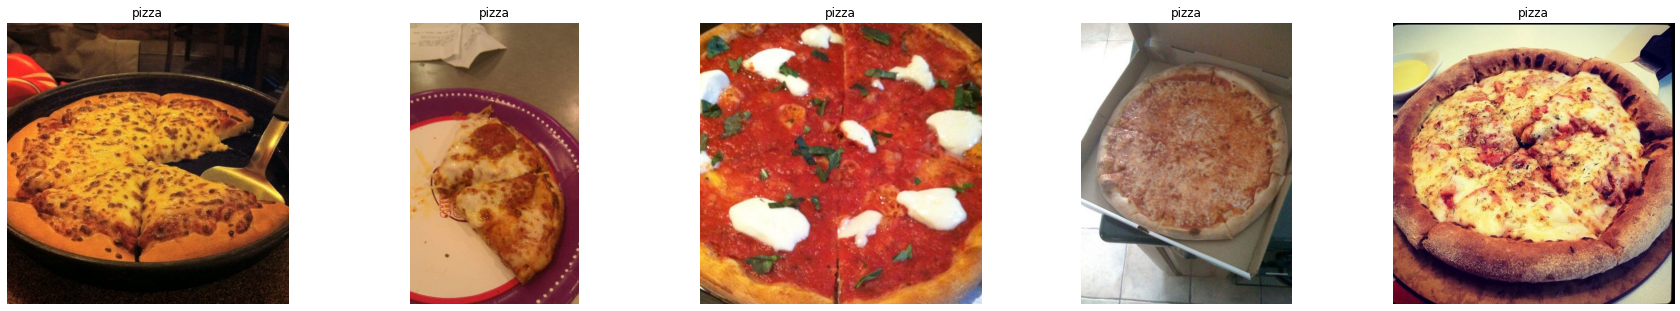

In [ ]:
 imagenes_aleatorias("pizza_steak/train/", "pizza", (30,30), 5)

**Por lo que podemos observar, las imágenes son bastante clarificativas.**

##Análisis

**Lo más importante a la hora de analizar nuestras imágenes es:**
 * **Saber su altura, anchura y color channels respectivamente:**
  * **En nuestro caso son (512, 512, 3). Que el canal sea el número 3 simboliza los colores RGB (rojo, verde y azul).**
 * **Visualizar la imagen como tensor para poder obtener el elemento con el valor máximo para poder preprocesarla. Para ello vamos a aplicar el siguiente código:**
 

In [ ]:
# Tensor de una imagen aleatoria, en este caso, una de 'steak':
aleatorio = random.sample(os.listdir("pizza_steak/train/steak"), 1)

img = mpimg.imread("pizza_steak/train/steak/"+aleatorio[0])

**El tensor resultante:**

In [ ]:
img

array([[[ 49,  68,  36],
        [ 49,  68,  36],
        [ 51,  68,  36],
        ...,
        [179, 138,  84],
        [191, 148,  97],
        [207, 163, 114]],

       [[ 64,  81,  49],
        [ 60,  77,  45],
        [ 55,  70,  39],
        ...,
        [179, 138,  82],
        [181, 137,  88],
        [192, 148, 101]],

       [[ 61,  75,  42],
        [ 58,  72,  39],
        [ 55,  68,  38],
        ...,
        [174, 133,  77],
        [173, 129,  84],
        [176, 131,  89]],

       ...,

       [[ 60,  75,  54],
        [ 59,  74,  53],
        [ 54,  72,  50],
        ...,
        [ 99,  63,  31],
        [ 98,  59,  28],
        [ 95,  56,  25]],

       [[ 57,  72,  51],
        [ 57,  72,  51],
        [ 58,  76,  54],
        ...,
        [ 87,  50,  21],
        [ 89,  52,  26],
        [ 86,  49,  23]],

       [[ 51,  66,  45],
        [ 53,  68,  47],
        [ 56,  74,  52],
        ...,
        [ 84,  47,  18],
        [ 85,  49,  27],
        [ 83,  47,  25]]

**Ahora calculamos el elemento con el valor máximo dentro del tensor:**

In [ ]:
img.max()

255

**El valor obtenido es 255.**

**Ya sabemos el valor por el cual tenemos que dividir todos los elementos de las imágenes para normalizarlas (valores entre 0 y 1).**

##Preprocesamiento (normalización)

**Debemos preprocesar nuestras imágenes para que nuestro modelo sea capaz de entrenar de forma óptima.**

**Primero vamos a especificar nuestros directorios de entrenamiento y testeo:**

In [6]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

**El siguiente paso es utilizar 'ImageDataGenerator' para preprocesar las imágenes (convertir los valores de los píxeles entre 1 y 0):**



In [7]:
train_data_gen=ImageDataGenerator(rescale=1./255) 
test_data_gen=ImageDataGenerator(rescale=1./255) # 255 porque es el valor máximo que obtuvimos del tensor.

**En nuestro caso, por ahora, no vamos a usar la utilidad de 'Data augmentation' ya que no sabemos si nuestro modelo va a mostrar en sus gráficos representativos un claro caso de overfitting.**

**En caso de que se demuestre, realizaremos los cambios pertinentes.**

**Para finalizar el proceso, vamos a convertir nuestras imágenes en `batches` y especificar el tamaño de la imágenes resultantes:**

In [8]:
train_data=train_data_gen.flow_from_directory(train_dir, # Directorio antes establecido desde donde se cargarán las imágenes.
                                             batch_size=32, # Número de imágenes aprendidas por proceso.
                                             target_size=(224,224), # Tamaño de nuestra imagen resultante.
                                             class_mode="binary", # Binary porque solo tenemos dos clases -> 1 y 0
                                             seed=42) # Establecer máxima reproducibilidad.

test_data=test_data_gen.flow_from_directory(test_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**Hemos establecido el `batch_size` a 32 ya que es el valor preestablecido y en el que menos problemas resulta.**

**El tamaño de la imagen resultante es de (224, 224) porque en ese tamaño todavía se almacenan los datos más importantes de la imagen y no requiere gasto de recursos computacionales como si lo estableciesemos a su valor original de (512, 512).**

**A continuación comprobaremos que el proceso de normalización se ha realizado correctamente en 3 pasos.**

**1er paso -> Comprobar que los valores de los píxeles se situan entre 0 y 1:**


In [9]:
images, labels = test_data.next()

In [ ]:
images[0].max()

1.0

In [ ]:
images[0].min()

0.0

**Correcto.**

**2º paso -> Ver si el tamaño de la imagen corresponde a (224, 224, 3):**

In [ ]:
images[0].shape

(224, 224, 3)

**Correcto.**

**3er paso -> Comprobar que los 'labels' sean valores binarios debido a que solo tenemos dos clases:**

In [ ]:
labels

array([1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.],
      dtype=float32)

**Correcto.**

**El proceso de normalización de nuestras imagenes se ha llevado a cabo de manera satisfactoria, de modo que nuestras imágenes están listas para ser introducidas en nuestro modelo de entrenamiento.**

#CREACIÓN DEL MODELO PRIMIGENIO CON CALLBACKS (CNN)

**Modelo con 'Callbacks' para poder realizar los siguientes modelos.**

**De esta manera podremos representar gráficos con los valores de `loss` y `accuracy` al igual que el `learning rate` y `epochs` para que en los proximos modelos los resultados sean más precisos.**

**Los hiperparámetros elegidos en el 'Modelo_callback' son escogidos de manera intuitiva debido a los datos que manejamos.**

**He tomado la decisión de usar varios layers y crear un modelo profundo para visualizar en la gráfica representativa del modelo si se produce 'overfitting'. 
Puesto que no contamos con más imágenes, si se produciese, quitariamos layers o usariamos `Data augmentation`.**

**Nuestros layers seran en 2D ya que trabajamos con imágenes.**

In [ ]:
tf.keras.set_seed=42 # Set_seed es importante ya que necesitamos la máxima reproducibilidad.

# Modelo CNN.
## Creación del modelo utilizando API secuencial. 
Modelo_callbacks = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         strides=1,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),# Necesitamos aclarar las dimensiones de nuestras imágenes
  tf.keras.layers.Conv2D(10, 3, 1, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "Valid"),
  tf.keras.layers.Conv2D(10, 3, 1,activation="relu"),
  tf.keras.layers.Conv2D(10, 3, 1, activation="relu"),    
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(10, 3, 1, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, 1, activation="relu"),    
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, "sigmoid") # sigmoid porque estamos ante un problema de clasificación binario.               
])                                    # 1 como output porque nuestro sistema es binario.
# Las funciones de activación escogidas se deben a sus propiedades 'non-linear'.

# Compilamos el modelo.
Modelo_callbacks.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Establecemos un set de valores del learning rate empezando desde 1e-4, incrementando 10**(epoch/20) cada epoch.
lr_ratio = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# Encajamos el modelo.
history_callbacks = Modelo_callbacks.fit(train_data,
                  epochs=50,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  verbose = 2,
                  callbacks = [lr_ratio])

Epoch 1/50
47/47 - 42s - loss: 0.6916 - accuracy: 0.5073 - val_loss: 0.6854 - val_accuracy: 0.5000
Epoch 2/50
47/47 - 9s - loss: 0.6652 - accuracy: 0.6453 - val_loss: 0.6054 - val_accuracy: 0.7400
Epoch 3/50
47/47 - 9s - loss: 0.5624 - accuracy: 0.7340 - val_loss: 0.5257 - val_accuracy: 0.7600
Epoch 4/50
47/47 - 9s - loss: 0.5368 - accuracy: 0.7653 - val_loss: 0.5074 - val_accuracy: 0.7560
Epoch 5/50
47/47 - 9s - loss: 0.5231 - accuracy: 0.7593 - val_loss: 0.5110 - val_accuracy: 0.7660
Epoch 6/50
47/47 - 9s - loss: 0.4959 - accuracy: 0.7760 - val_loss: 0.4214 - val_accuracy: 0.8080
Epoch 7/50
47/47 - 10s - loss: 0.4360 - accuracy: 0.8027 - val_loss: 0.3780 - val_accuracy: 0.8380
Epoch 8/50
47/47 - 9s - loss: 0.4227 - accuracy: 0.8213 - val_loss: 0.3546 - val_accuracy: 0.8620
Epoch 9/50
47/47 - 10s - loss: 0.4106 - accuracy: 0.8260 - val_loss: 0.3855 - val_accuracy: 0.8380
Epoch 10/50
47/47 - 10s - loss: 0.4054 - accuracy: 0.8280 - val_loss: 0.3642 - val_accuracy: 0.8580
Epoch 11/50
47/

**Como podemos observar, los valores mas altos de `accuracy` los obtenemos entre los epochs 10 y 17.**

**Interpretando los valores de `val_loss`, siendo este las pérdidas del set de testeo, podemos deducir que en los epochs establecidos se produce overfitting ya que los valores aumentan, aunque lo veremos mejor cuando representemos los resultados de manera gráfica.**

##Arquitectura de nuestro modelo callback

In [ ]:
Modelo_callbacks.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 51, 51, 10)        9

**La función de la capa `MaxPool2D` es extraer los `features` más importantes aprendidos en las capas anteriores.**

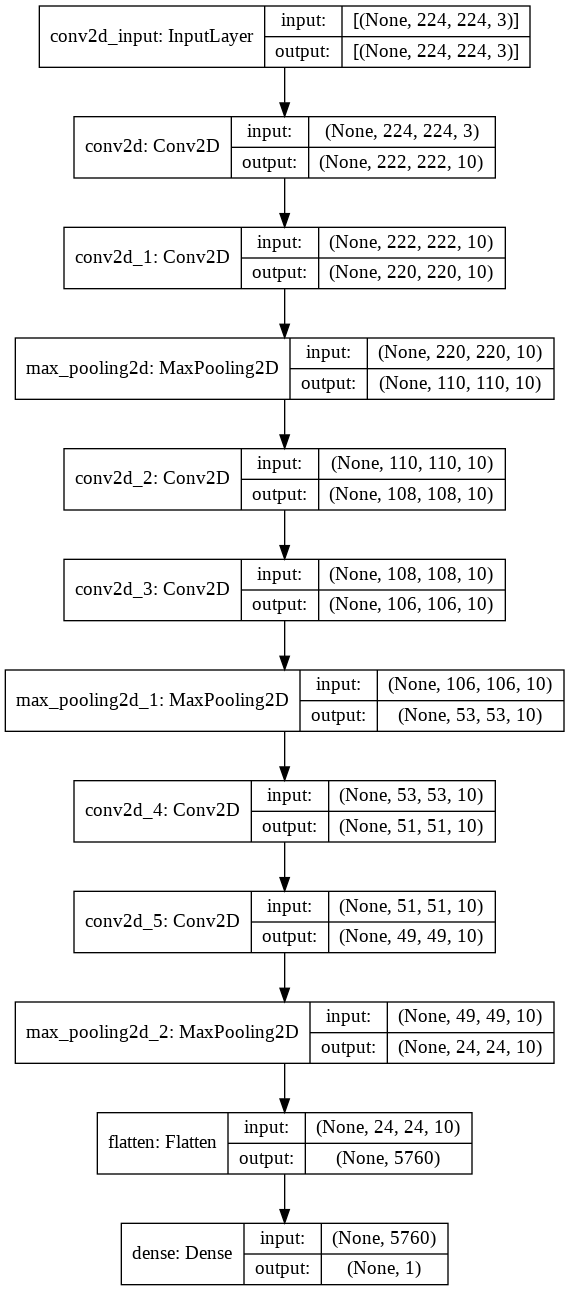

In [ ]:
plot_model(Modelo_callbacks,show_shapes=True)

##Representación gráfica de nuestro modelo callback para optimizar los siguientes modelos.

**Vamos a definir 2 funciones para poder visualizar el `learning rate`, `loss` y `accuracy`:**

In [ ]:
def grafico_loss_accuracy_lr(history):
  pd.DataFrame(history.history).plot(figsize=(10,8),xlabel="epochs") 

def lr_loss(history):
  lr_valor = 1e-4 *10**(tf.range(50)/20)
  plt.figure(figsize=(20,7))
  plt.semilogx(lr_valor,history.history["loss"])
  plt.xlabel("learning rate")
  plt.ylabel("loss")

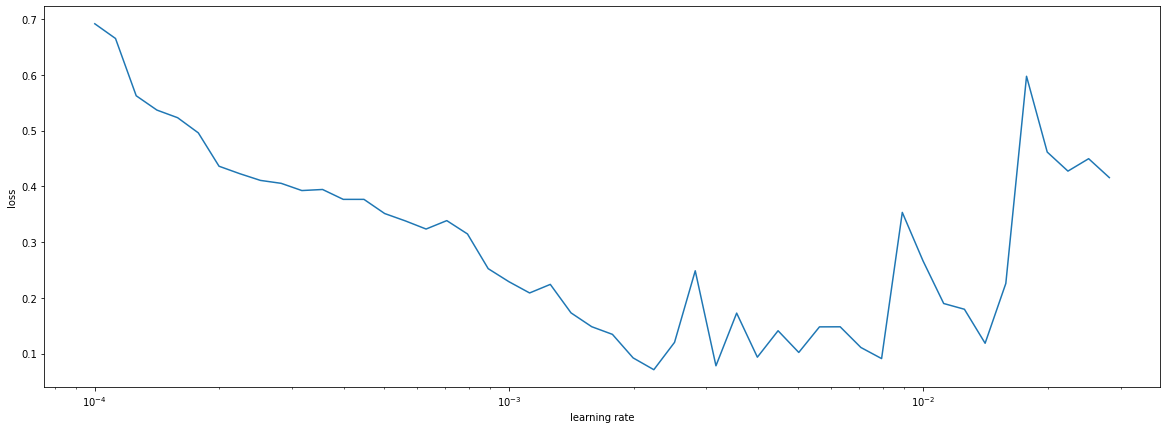

In [ ]:
lr_loss(history_callbacks)

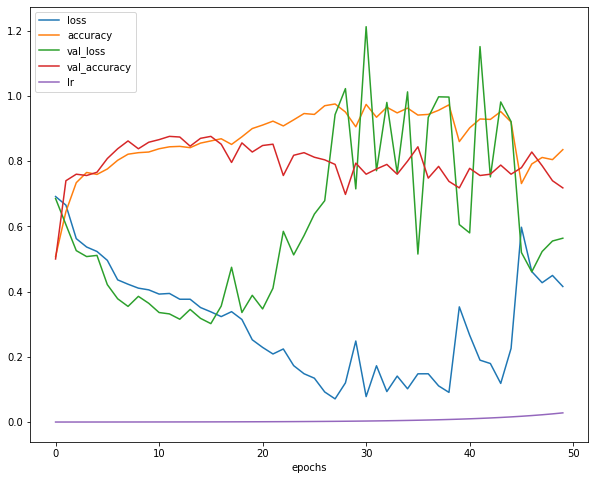

In [ ]:
grafico_loss_accuracy_lr(history_callbacks)

**Existe un claro caso de overfitting a partir del epoch 15 aproximadamente.**

**La solución a este problema sería:**
 * **Aumentar la cantidad de datos de los que disponemos.**
 * **Utilizar la herramienta de `Data augmentation`.**
 * **Reducir el número de capas del modelo.**

**Vamos a volver a crear el mismo modelo pero disminuyendo el número de `layers` y utilizando `Data augmentation`.**

#SEGUNDO MODELO CON CALLBACKS PARA REDUCIR EL OVERFITTING



**Vamos a preprocesar las imágenes de aumento únicamente en el test de entrenamiento ya que nuestro modelo esta aprendiendo demasiado bien las imágenes y luego no es capaz de generalizar con las imágenes de testeo.**

In [10]:
train_data_gen_augmented=ImageDataGenerator(rescale=1./255,
                                         rotation_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         horizontal_flip=False)

train_data_augmented=train_data_gen_augmented.flow_from_directory(train_dir,
                                                             target_size=(224,224),
                                                             batch_size=32,
                                                             class_mode="binary",
                                                             shuffle=True)

Found 1500 images belonging to 2 classes.


**Creamos el modelo:**

In [ ]:
tf.keras.set_seed=42 # Set_seed es importante ya que necesitamos la máxima reproducibilidad.

# Modelo CNN.
## Creación del modelo utilizando API secuencial. 
Modelo_callbacks_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         strides=1,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10, 3, 1, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "Valid"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, "sigmoid")             
])                                   


# Compilamos el modelo.
Modelo_callbacks_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Establecemos un set de valores del learning rate empezando desde 1e-4, incrementando 10**(epoch/20) cada epoch.
lr_ratio = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# Encajamos el modelo.
history_callbacks_1 = Modelo_callbacks_1.fit(train_data_augmented,
                  epochs=50,
                  steps_per_epoch=len(train_data_augmented),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  verbose = 2,
                  callbacks = [lr_ratio])

Epoch 1/50
47/47 - 22s - loss: 0.5911 - accuracy: 0.6820 - val_loss: 0.5069 - val_accuracy: 0.7560
Epoch 2/50
47/47 - 23s - loss: 0.5735 - accuracy: 0.7007 - val_loss: 0.4899 - val_accuracy: 0.7640
Epoch 3/50
47/47 - 24s - loss: 0.5440 - accuracy: 0.7413 - val_loss: 0.4535 - val_accuracy: 0.7780
Epoch 4/50
47/47 - 24s - loss: 0.5304 - accuracy: 0.7420 - val_loss: 0.4286 - val_accuracy: 0.8100
Epoch 5/50
47/47 - 24s - loss: 0.5365 - accuracy: 0.7380 - val_loss: 0.4131 - val_accuracy: 0.8220
Epoch 6/50
47/47 - 24s - loss: 0.4877 - accuracy: 0.7713 - val_loss: 0.3843 - val_accuracy: 0.8160
Epoch 7/50
47/47 - 24s - loss: 0.4896 - accuracy: 0.7680 - val_loss: 0.4069 - val_accuracy: 0.8180
Epoch 8/50
47/47 - 24s - loss: 0.4777 - accuracy: 0.7820 - val_loss: 0.3485 - val_accuracy: 0.8460
Epoch 9/50
47/47 - 24s - loss: 0.4714 - accuracy: 0.7767 - val_loss: 0.3406 - val_accuracy: 0.8480
Epoch 10/50
47/47 - 24s - loss: 0.4728 - accuracy: 0.7820 - val_loss: 0.3521 - val_accuracy: 0.8520
Epoch 11/

**Procederemos a visualizar los gráficos de pérdidas de los dos modelos y veremos si se han producido cambios sustanciales al añadir `Data augmentation` y reduciendo el número de layers.**

##Comparativa de los modelos con callbacks

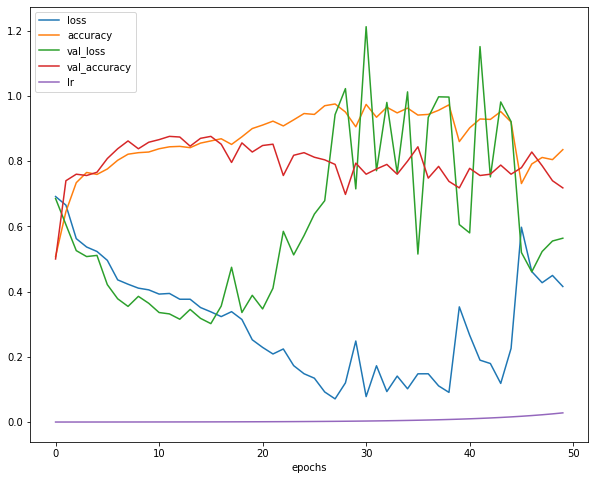

In [ ]:
grafico_loss_accuracy_lr(history_callbacks)

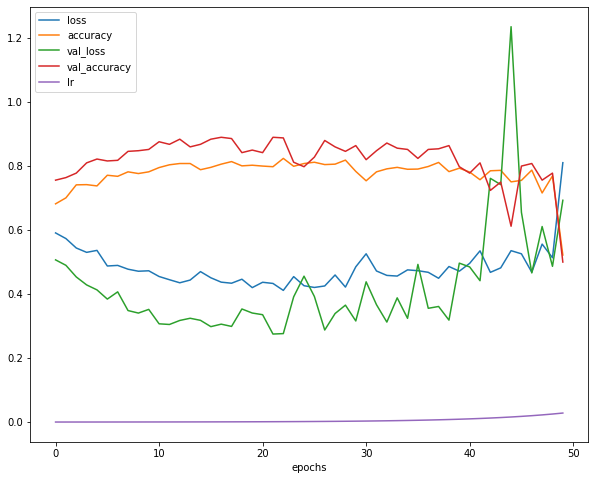

In [ ]:
grafico_loss_accuracy_lr(history_callbacks_1)

**Se puede apreciar una mejora significativa aunque se siga apreciando overfitting en el modelo con `Data augmentation`, pero en mucha menor medida.**

**El modelo con el que basaremos nuestros modelos de entrenamiento (arquitectura) será el modelo de `Data augmentation`.**

**A partir de estos gráficos más la información del glosario de la evaluación del modelo podremos adaptar el learning rate especifico creando un tensor para que cada elemento en su interior corresponda al learning rate específico del epoch concreto con la fórmula:**

* lr_valor[epoch a escoger] = 1e-4 * 10**(tf.range(50)/20)

#MODELOS DE ENTRENAMIENTO

**Vamos a comenzar con nuestros modelos de entrenamiento utilizando la misma arquitectura que el Modelo_callbacks_1 en los primeros 3 modelos pero probando distintos valores de Learning rate y epochs.**

**Finalmente realizaré experimentaciones aleatorias con un modelo variando los parámetros que considere necesarios, dejando plasmado el resultado de la mejor experimentación.**

**En cada modelo mostraré una tabla en la cual se refleja el nivel de `accuracy`. Cuando el último modelo sea completado procederemos a comparar los resultados de `accuracy`.**

**Finalmente, con el modelo que obtengamos mejores resultados procederemos a descargar una imagen de la red y veremos las predicciones de nuestro modelo.**

**A continuación, definiremos la fórmula para obtener el tensor con los valores de Learning rate:**


In [ ]:
lr_valor = 1e-4 *10**(tf.range(50)/20)

##Modelo_1

**Learning rate de 10 epochs:**

In [ ]:
print(lr_valor[10])

tf.Tensor(0.00031622776601683794, shape=(), dtype=float64)


***`0.00031622776601683794`* es el valor del learning rate en el epoch 10.**

**Creamos el modelo:**

In [ ]:
tf.keras.set_seed=42 # Set_seed es importante ya que necesitamos la máxima reproducibilidad.

# Modelo CNN.
## Creación del modelo utilizando API secuencial. 
Modelo_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         strides=1,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10, 3, 1, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "Valid"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, "sigmoid")])

# Compilamos el modelo.
Modelo_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.00031622776601683794),
              metrics=["accuracy"])

# Encajamos el modelo.
history_1 = Modelo_1.fit(train_data_augmented,
                  epochs=10,
                  steps_per_epoch=len(train_data_augmented),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  verbose = 0)

# Evaluamos el modelo.
Modelo_1.evaluate(test_data)

16/16 [==============================] - 2s 144ms/step - loss: 0.3953 - accuracy: 0.8180


[0.39533019065856934, 0.8180000185966492]

###**Definimos una función para obtener una tabla que nos muestre el parámetro `accuracy` de este modelo y el de los siguientes:**



In [ ]:
def accuracy(modelo):
  accuracy = modelo.evaluate(test_data, verbose = 0)
  a = tf.constant(accuracy)
  b = a[1].numpy()*100
  c = f"{(b):.2f}%"
  resultado_modelo = [["Modelo",c]]
  return pd.DataFrame(resultado_modelo, columns=["Modelo", "accuracy"])

**Definimos la función que nos permitirá obtener el valor numérico de `accuracy` para más adelante poder crear una tabla comparativa entre modelos:**

In [ ]:
def accuracy_value(modelo):
  accuracy = modelo.evaluate(test_data, verbose = 0)
  a = tf.constant(accuracy)
  b = a[1].numpy()*100
  c = f"{(b):.2f}%"
  return c

#####**Visualizamos el parámetro `accuracy`:**

In [ ]:
accuracy(Modelo_1)

,Modelo,accuracy
0,Modelo,81.80%


##Modelo_2

**Learning rate de 14 epochs:**

In [ ]:
print(lr_valor[14])

tf.Tensor(0.0005011872336272723, shape=(), dtype=float64)


***`0.0005011872336272723`* es el valor del learning rate en el epoch 14.**

**Creamos el modelo:**

In [ ]:
tf.keras.set_seed=42 # Set_seed es importante ya que necesitamos la máxima reproducibilidad.

# Modelo CNN.
## Creación del modelo utilizando API secuencial. 
Modelo_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         strides=1,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10, 3, 1, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "Valid"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, "sigmoid")])

# Compilamos el modelo.
Modelo_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.0005011872336272723),
              metrics=["accuracy"])

# Encajamos el modelo.
history_2 = Modelo_2.fit(train_data_augmented,
                  epochs=14,
                  steps_per_epoch=len(train_data_augmented),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  verbose = 0)

# Evaluamos el modelo.
Modelo_2.evaluate(test_data)

16/16 [==============================] - 2s 143ms/step - loss: 0.2935 - accuracy: 0.8780


[0.29351335763931274, 0.878000020980835]

###**Visualizamos el parámetro `accuracy`:**

In [ ]:
accuracy(Modelo_2)

,Modelo,accuracy
0,Modelo,87.80%


##Modelo_3

**Learning rate de 22 epochs:**

In [ ]:
print(lr_valor[22])

tf.Tensor(0.0012589254117941675, shape=(), dtype=float64)


***`0.0012589254117941675`* es el valor del learning rate en el epoch 22.**

**Creamos el modelo:**

In [ ]:
tf.keras.set_seed=42 # Set_seed es importante ya que necesitamos la máxima reproducibilidad.

# Modelo CNN.
## Creación del modelo utilizando API secuencial. 
Modelo_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         strides=1,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10, 3, 1, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "Valid"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, "sigmoid")])

# Compilamos el modelo.
Modelo_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.0012589254117941675),
              metrics=["accuracy"])

# Encajamos el modelo.
history_3 = Modelo_3.fit(train_data_augmented,
                  epochs=22,
                  steps_per_epoch=len(train_data_augmented),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  verbose = 0)

# Evaluamos el modelo.
Modelo_3.evaluate(test_data)

16/16 [==============================] - 2s 146ms/step - loss: 0.3040 - accuracy: 0.8800


[0.3039989769458771, 0.8799999952316284]

####**Visualizamos el parámetro `accuracy`:**

In [ ]:
accuracy(Modelo_3)

,Modelo,accuracy
0,Modelo,88.00%


##Modelo_experimental

**En nuestro modelo experimental vamos a cambiar los hiperparámetros y la arquitectura:**

In [ ]:
tf.keras.set_seed=42 # Set_seed es importante ya que necesitamos la máxima reproducibilidad.

# Modelo CNN.
## Creación del modelo utilizando API secuencial. 
Modelo_experimental = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32,
                         strides=1,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(32, 1, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "Valid"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, "sigmoid")])

# Compilamos el modelo.
Modelo_experimental.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.0012589941675),
              metrics=["accuracy"])

# Encajamos el modelo.
history_experimental = Modelo_experimental.fit(train_data_augmented,
                  epochs=16,
                  steps_per_epoch=len(train_data_augmented),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  verbose = 0)

# Evaluamos el modelo.
Modelo_experimental.evaluate(test_data)

16/16 [==============================] - 2s 130ms/step - loss: 0.2955 - accuracy: 0.8840


[0.2955290973186493, 0.8840000033378601]

####**Arquitectura de Modelo_experimental:**

In [ ]:
Modelo_experimental.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 74, 74, 32)        1056      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 43808)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 43809     
Total params: 45,761
Trainable params: 45,761
Non-trainable params: 0
_________________________________________________________________


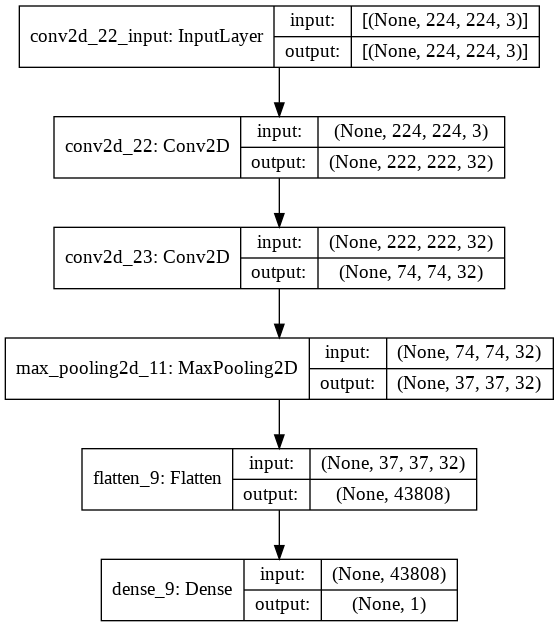

In [ ]:
plot_model(Modelo_experimental,show_shapes=True)

####**Visualizamos el parámetro `accuracy`:**

In [ ]:
accuracy(Modelo_experimental)

,Modelo,accuracy
0,Modelo,88.40%


#COMPARACIONES ENTRE LOS RESULTADOS DE LOS MODELOS DE ENTRENAMIENTO

**Vamos a proceder a ilustrar mediante una tabla los diferentes
resultados de `accuracy` en los modelos de entrenamiento:**

In [ ]:
Resultados = [["Modelo_1", accuracy_value(Modelo_1)],
              ["Modelo_2", accuracy_value(Modelo_2)],
              ["Modelo_3", accuracy_value(Modelo_3)],
              ["Modelo_experimental", accuracy_value(Modelo_experimental)]]

Comparativa = pd.DataFrame(Resultados, columns=["Modelos", "Accuracy"])
Comparativa

,Modelos,Accuracy
0,Modelo_1,81.80%
1,Modelo_2,87.80%
2,Modelo_3,88.00%
3,Modelo_experimental,88.40%


**Como podemos observar, los resultados son muy similares exceptuando el Modelo_1.**

**Aun así, seguimos teniendo que decidirnos ante un modelo concreto y en nuestro caso ese modelo será:**

 * **Modelo_experimental**

#PREDICCIONES

**Para comprobar las predicciones de nuestro Modelo_experimental, vamos a descargar una imagen de internet de steak o pizza.**

**Hay que tener en cuenta que la imagen de la cual hagamos la predicción debe ser preprocesada:**
 * **Debe estar en la mismas dimensiones en las que nuestro modelo entrenó, es decir, (32, 224, 224, 3). '32' equivale al `batch_size` de nuestro modelo.**

**Primero vamos a proceder a descargar la imagen desde mi repositorio personal de GitHub:**

In [13]:
!wget https://raw.githubusercontent.com/Miqquelangel/Proyecto-1-Regression/main/images/steak.jpg

--2021-07-20 19:50:59--  https://raw.githubusercontent.com/Miqquelangel/Proyecto-1-Regression/main/images/steak.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13113 (13K) [image/jpeg]
Saving to: ‘steak.jpg’

steak.jpg           100%[===================>]  12.81K  --.-KB/s    in 0s      

2021-07-20 19:51:00 (86.0 MB/s) - ‘steak.jpg’ saved [13113/13113]



**Debemos saber las dimensiones de la imagen y el valor máximo dentro de su tensor para poder preprocesarla:**

In [34]:
imagen_prediccion = tf.io.read_file("steak.jpg")
imagen_prediccion = tf.image.decode_image(imagen_prediccion)
imagen_prediccion.shape

TensorShape([194, 259, 3])

In [35]:
tf.math.reduce_max(imagen_prediccion)

<tf.Tensor: shape=(), dtype=uint8, numpy=255>

**Una vez que conocemos estos valores, procederemos a definir una función la cual nos transforme nuestras imágenes personales a un formato adecuado para que realize predicciones automáticamente sobre cualquier modelo:**

##Función de predicción

In [14]:
def Prediccion_imagen(modelo, clases, file, input_shape, figsize): 
  img = tf.io.read_file(file)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, [input_shape, input_shape])
  img = img/tf.math.reduce_max(img) 
  modelo.predict(tf.expand_dims(img, axis=0)) # Expandimos una dimensión por que nuestro modelo predice el batch_size
  pred = modelo.predict(tf.expand_dims(img, axis=0))
  predclass = clases[int(tf.round(pred))]
  plt.figure(figsize = figsize)
  plt.imshow(img)
  plt.title(f"Predicción: {predclass}")
  plt.axis(False);

###Resultados

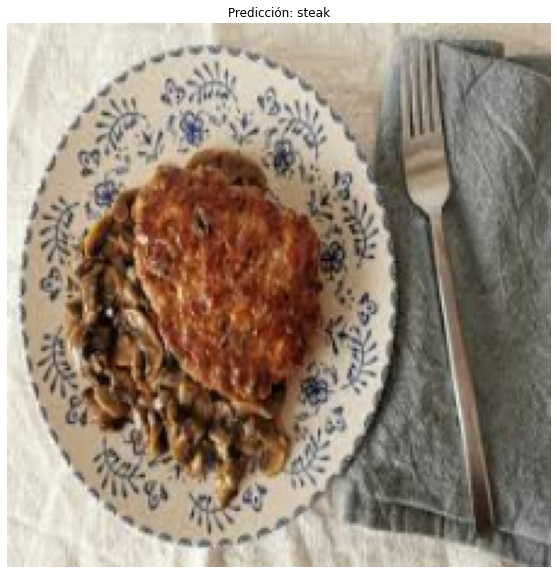

In [15]:
Prediccion_imagen(Modelo_experimental, Clases, "steak.jpg", 224, (10,10))

**Nuestro modelo obtiene la predicción correcta.**

**Vamos a ver otra predicción:**

In [17]:
!wget https://raw.githubusercontent.com/Miqquelangel/Proyecto-1-Regression/main/images/pizza1.jpg

--2021-07-20 19:53:41--  https://raw.githubusercontent.com/Miqquelangel/Proyecto-1-Regression/main/images/pizza1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14595 (14K) [image/jpeg]
Saving to: ‘pizza1.jpg’

pizza1.jpg          100%[===================>]  14.25K  --.-KB/s    in 0s      

2021-07-20 19:53:41 (96.5 MB/s) - ‘pizza1.jpg’ saved [14595/14595]



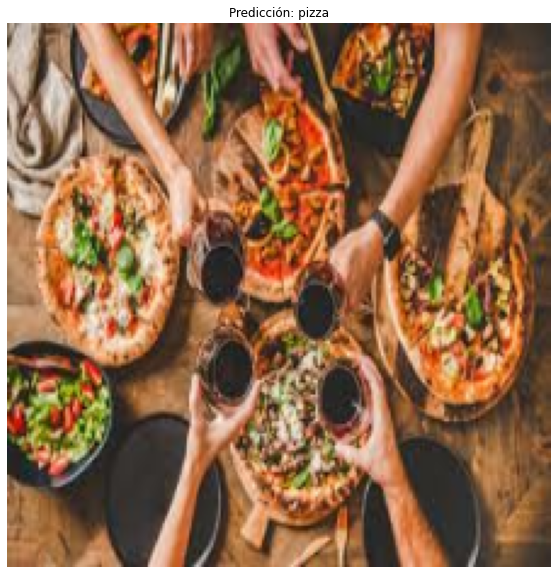

In [18]:
Prediccion_imagen(Modelo_experimental, Clases, "pizza1.jpg", 224, (10,10))

#CONCLUSIONES

**El modelo por lo general presenta un buen rendimiento pero siempre es mejorable.**

**Las soluciones irían desde aumentar el tamaño de los datos con los que contamos, reducir el numero de layers para reducir el overfitting, modificar aún mas nuestras imágenes con `Data augmentation`, etc.**

**Otra opción sería la de implementar `transfer learning`. En resumen, seguir experimentando con el modelo.**